In [1]:
%matplotlib notebook

In [2]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

In [3]:
# Read and shuffle data
housing_data = pd.read_csv("Resources/housing_data.csv")
housing_data = housing_data.sample(frac=1).reset_index(drop=True)
housing_data.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.13642,0.0,10.59,0,0.489,5.891,22.3,3.9454,4,277.0,18.6,396.90,10.87,22.6
1,0.13914,0.0,4.05,0,0.510,5.572,88.5,2.5961,5,296.0,16.6,396.90,14.69,23.1
2,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0
3,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296.0,16.6,393.23,10.11,23.2
4,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241.0,18.2,341.60,12.93,20.1


In [4]:
# Sampling the data
#------------------
sp_size = 25 # (user defined) nb of elements in each sample
nb_sample = 20 # (user defined) nb of sample to consider

# Creating the samples (regularly distributed along the data)
dist = int(np.floor((len(housing_data) - sp_size*nb_sample)/(nb_sample-1))) # distance between each sample
samples = [ housing_data.iloc[np.arange(ss*sp_size + ss*dist, (ss+1)*sp_size + ss*dist),13]  for ss in range(0,nb_sample) ]

# Check for overlapping
sp_rate = np.size(samples)/len(housing_data)*100
if sp_rate>100:
    print("There is overlap!")
print("Sampling rate: %.2f%%"%(sp_rate))

Sampling rate: 99.01%


In [5]:
# Calculate the mean for each sample
mean_per_sample = [np.mean(sp) for sp in samples]
mean_per_sample

[24.035999999999998,
 20.604,
 20.176000000000002,
 23.94,
 19.416,
 22.747999999999998,
 23.064000000000007,
 21.716000000000005,
 25.108,
 22.812,
 19.823999999999998,
 24.408,
 22.048000000000002,
 23.439999999999994,
 23.364,
 22.684,
 22.780000000000005,
 25.496000000000002,
 21.983999999999995,
 20.012000000000004]

In [6]:
sem_per_sample = [sem(sp) for sp in samples]
sem_per_sample

[2.0727106246008713,
 1.5686457003840393,
 1.7651088729405147,
 1.6683025305181711,
 1.4454835407802702,
 2.0135467878017304,
 1.6950897714673796,
 1.7735245510940447,
 1.8227810254297325,
 1.5540840818093895,
 1.8496060841883781,
 2.285409664225067,
 2.0232244891097313,
 1.1328136063212988,
 2.1984606735926238,
 1.7402459596275466,
 1.9673078050981243,
 2.3209156239151247,
 1.7641492756188935,
 1.7247736083324097]

In [7]:
# plt.figure()
# plt.errorbar(np.arange(nb_sample),mean_per_sample , yerr=sem_per_sample)
# plt.show()

<IPython.core.display.Javascript object>


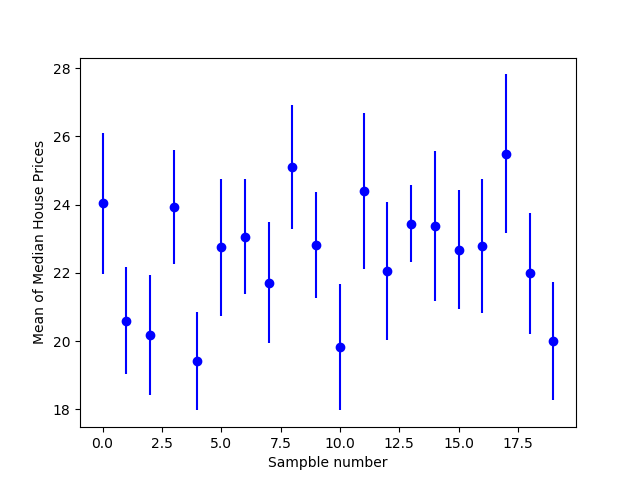

Text(0,0.5,'Mean of Median House Prices')

In [8]:
fig, ax = plt.subplots()
ax.errorbar(np.arange(0,nb_sample),mean_per_sample , yerr=sem_per_sample, fmt='o', color='b')
ax.set_xlabel('Sampble number')
ax.set_ylabel('Mean of Median House Prices')